# Importing Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import statsmodels.api as sm
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

## Importing Packages for Data Modeling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

import graphviz
from sklearn import metrics
from sklearn.linear_model import LogisticRegression as logReg
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier

In [4]:
df = pd.read_csv('student_dropout_academic_success.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Preprocessing

In [5]:
df['Target'] = df['Target'].astype('category')
df.dropna(subset=['Target'], inplace=True)
df.isna().sum()

,0
Marital status,0
Application mode,0
Application order,1
Course,2
Daytime/evening attendance\t,3
Previous qualification,3
Previous qualification (grade),5
Nacionality,5
Mother's qualification,4
Father's qualification,4


# Data Visualization

In [6]:
# 1. Distribution of Target Variable
fig = px.histogram(df, x="Target", title="Distribution of Target Variable")
fig.show()

# 2. Impact of Gender on Target Variable
fig = px.histogram(df, x="Target", color="Gender",
                   title="Impact of Gender on Target Variable")
fig.show()

# 3. Impact of Marital Status on Target Variable
fig = px.histogram(df, x="Marital status", color="Target",
                   title="Impact of Marital Status on Target Variable")
fig.show()

# 4. Daytime/Evening Attendance vs Target
fig = px.histogram(df, x="Daytime/evening attendance\t", color="Target",
                   title="Daytime/Evening Attendance vs Target")
fig.show()

# 5.  Relationship between Previous Qualification and Target (using a grouped bar chart)
fig = px.histogram(df, x="Previous qualification", color="Target", barmode='group',
                   title="Relationship between Previous Qualification and Target")
fig.show()

# 6.  Debtor vs Target
fig = px.histogram(df, x="Debtor", color="Target",
                   title="Debtor vs Target")
fig.show()

# 7.  Tuition fees up to date? vs Target
fig = px.histogram(df, x="Tuition fees up to date", color="Target",
                   title="Tuition fees up to date vs Target")
fig.show()


# 8.  International vs Target
fig = px.histogram(df, x="International", color="Target",
                   title="International vs Target")
fig.show()

## Spliting the Data

In [7]:
# Separating the predictors (X) and the response (y)
df['Target'] = df['Target'].cat.codes
X = df.drop('Target', axis=1)
y = df['Target']
X.fillna(X.mean(), inplace=True)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data modeling

## Logistic Regression

In [8]:
# Adding constant to the predictor variables
X_train_logReg = sm.add_constant(X_train)
X_test_logReg= sm.add_constant(X_test)

# Training the logistic regression model
logReg_model= sm.MNLogit(y_train, X_train_logReg).fit(maxiter=100)

# Printing the model summary
print(logReg_model.summary())

Optimization terminated successfully.
         Current function value: 0.551269
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:                 3535
Model:                        MNLogit   Df Residuals:                     3461
Method:                           MLE   Df Model:                           72
Date:                Sun, 01 Dec 2024   Pseudo R-squ.:                  0.4584
Time:                        18:31:06   Log-Likelihood:                -1948.7
converged:                       True   LL-Null:                       -3598.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      Target=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                               

In [9]:
# Making predictions on the test set
y_hat = logReg_model.predict(X_test_logReg)

# Getting predicted class labels
y_pred = y_hat.idxmax(axis=1)

#Printing Confusion matrix and accuracy
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[229  27  41]
 [ 42  50  67]
 [ 14  22 392]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       297
           1       0.51      0.31      0.39       159
           2       0.78      0.92      0.84       428

    accuracy                           0.76       884
   macro avg       0.70      0.67      0.67       884
weighted avg       0.74      0.76      0.74       884

0.7590497737556561


## KNN

In [10]:
# Training the KNN model with n = 1
knn_model = knn(n_neighbors=1)
knn_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluating the model
print("KNN Accuracy (n=1):", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy (n=1): 0.5667420814479638
[[148  52  97]
 [ 40  55  64]
 [ 59  71 298]]
              precision    recall  f1-score   support

           0       0.60      0.50      0.54       297
           1       0.31      0.35      0.33       159
           2       0.65      0.70      0.67       428

    accuracy                           0.57       884
   macro avg       0.52      0.51      0.51       884
weighted avg       0.57      0.57      0.57       884



In [11]:
# Running a for loop to check the best K with highest accuracy
acc_scores = []

for k in range(1,20, 2):
  knn_model= knn(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  preds = knn_model.predict(X_test)
  print(f'Accuracy score when k = {k} : {accuracy_score(y_test, preds)}')
  acc_scores.append(accuracy_score(y_test, preds))

print(f'Maximum accuracy score : {max(acc_scores)}')

Accuracy score when k = 1 : 0.5667420814479638
Accuracy score when k = 3 : 0.5859728506787331
Accuracy score when k = 5 : 0.5859728506787331
Accuracy score when k = 7 : 0.6074660633484162
Accuracy score when k = 9 : 0.6063348416289592
Accuracy score when k = 11 : 0.6063348416289592
Accuracy score when k = 13 : 0.5961538461538461
Accuracy score when k = 15 : 0.6085972850678733
Accuracy score when k = 17 : 0.5950226244343891
Accuracy score when k = 19 : 0.5972850678733032
Maximum accuracy score : 0.6085972850678733


## Naive Bayes

In [12]:
# Training the Naive Bayes model
nb_model = nb()
nb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluating the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.667420814479638
[[203  18  76]
 [ 36  30  93]
 [ 33  38 357]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       297
           1       0.35      0.19      0.24       159
           2       0.68      0.83      0.75       428

    accuracy                           0.67       884
   macro avg       0.59      0.57      0.57       884
weighted avg       0.64      0.67      0.65       884



## Decision Tree

In [13]:
 # Initialize and train the decision tree regressor
dt_classifier = DecisionTreeClassifier(criterion = 'gini')
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.5622171945701357


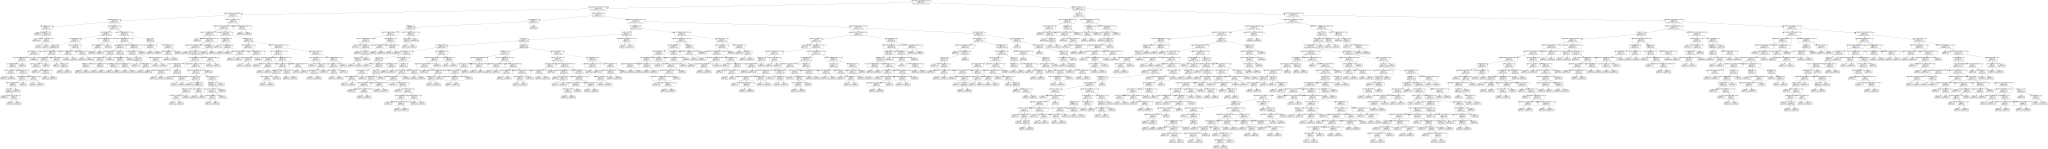

In [14]:
#visiulize the decision tree

export_graphviz(dt_classifier,
                out_file = 'student.dot',
                feature_names = X_train.columns
)

with open('student.dot') as f:
  dt_graph = f.read()
graphviz.Source(dt_graph)

## Prunning

In [15]:
#grab all the possible best subtrees
#with their alpha values
subtrees = dt_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = subtrees.ccp_alphas, subtrees.impurities
print(ccp_alphas)

[0.         0.00017408 0.00018492 0.00018723 0.00022019 0.00022484
 0.00024752 0.00024752 0.00024752 0.00024752 0.00026268 0.00026268
 0.00026403 0.00026403 0.00026521 0.00026521 0.00026717 0.00026941
 0.00027059 0.00027142 0.00027201 0.00027201 0.00027376 0.00027376
 0.00027407 0.00027431 0.00027503 0.0002766  0.00027745 0.00027765
 0.00027847 0.0002789  0.00028054 0.00028289 0.00028289 0.00028289
 0.00028289 0.00028289 0.00028289 0.00028289 0.00028289 0.00028289
 0.00028289 0.00028289 0.00028289 0.00028289 0.00028289 0.00028289
 0.00028289 0.00028289 0.00028289 0.00028289 0.00028289 0.00028289
 0.00028289 0.00028289 0.00028289 0.00028289 0.00028289 0.00028289
 0.00028289 0.00028289 0.00028289 0.00028289 0.00028289 0.00028289
 0.00028289 0.00028289 0.00028289 0.00029686 0.00033366 0.00033892
 0.00033946 0.00033946 0.00033946 0.00033946 0.00034242 0.00035204
 0.00035361 0.00037441 0.00037631 0.00037718 0.00037718 0.00037718
 0.00037718 0.00037718 0.00037718 0.00037718 0.00037718 0.0003

In [16]:
# For each alpha, we train and test the decision tree

train_acc_list = []
test_acc_list = []

for ccp_alpha in ccp_alphas:
  dt = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
  dt.fit(X_train, y_train)
  train_pred = dt.predict(X_train)
  test_pred = dt.predict(X_test)
  train_acc = metrics.accuracy_score(train_pred, y_train)
  test_acc = metrics.accuracy_score(test_pred, y_test)
  train_acc_list.append(train_acc)
  test_acc_list.append(test_acc)

In [17]:
test_acc_list.index(max(test_acc_list))

329

In [18]:
# Finding the highest alpha
alpha = ccp_alphas[test_acc_list.index(max(test_acc_list))]
alpha

0.0011228767664411233

47
Test Accuracy:  0.7590497737556561


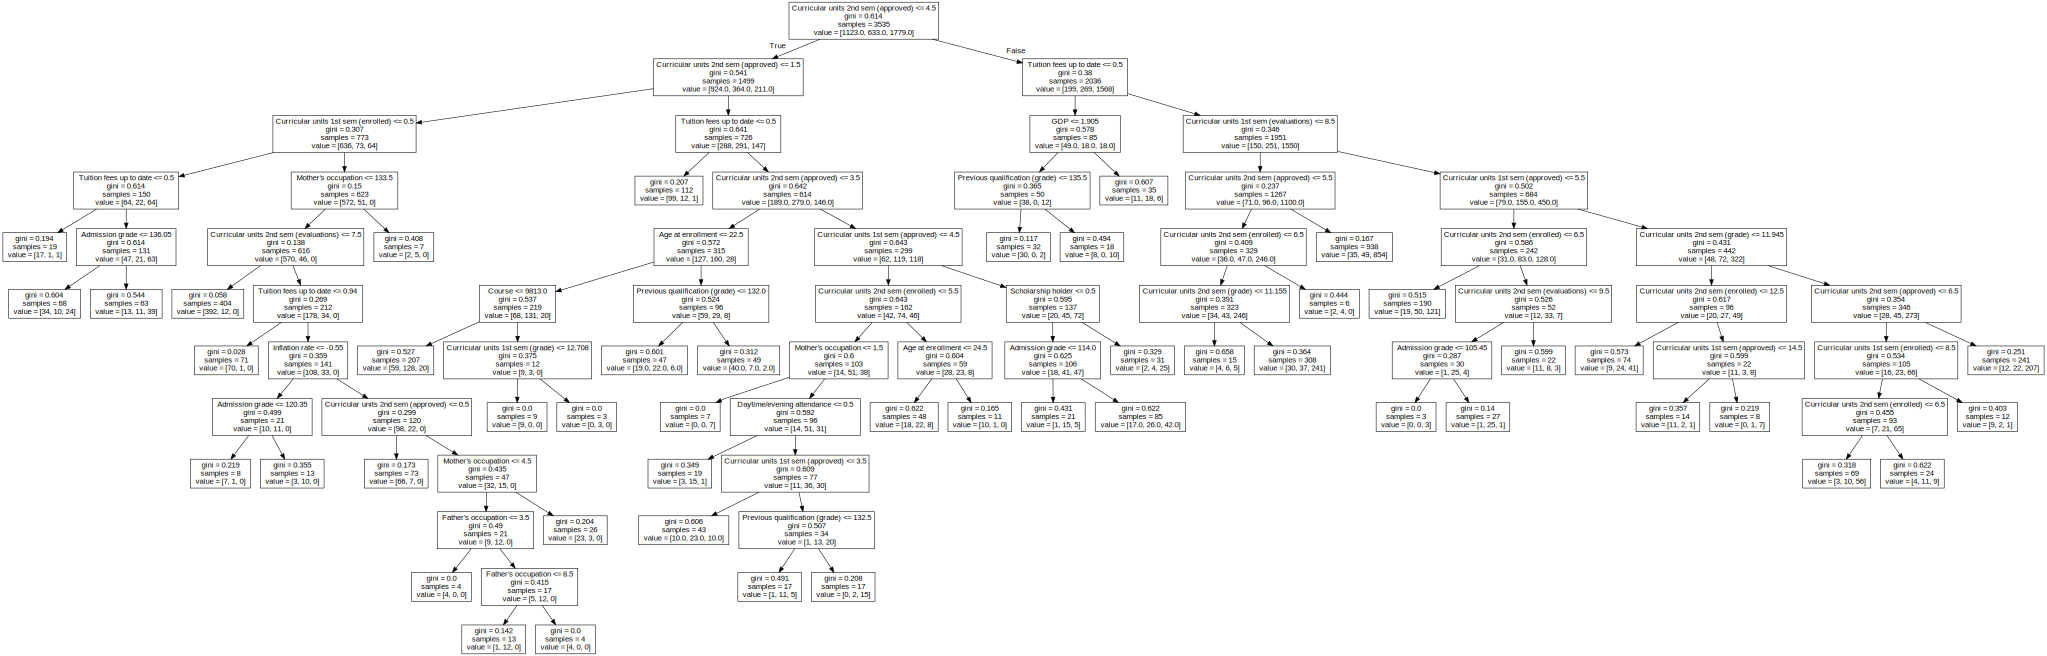

In [19]:
#Plotting the best decision tree with the highest alpha
best_dt = DecisionTreeClassifier(ccp_alpha = alpha)
best_dt.fit(X_train, y_train)
print(best_dt.tree_.n_leaves)

preds = best_dt.predict(X_test)
test_acc = metrics.accuracy_score(preds, y_test)
print("Test Accuracy: ", test_acc)

# Visulaize the decision tree

export_graphviz(best_dt,
                out_file = 'student_best_dt.dot',
                feature_names = X_train.columns
)

with open('student_best_dt.dot') as f:
  dt_graph = f.read()
graphviz.Source(dt_graph)

## Random Forest

Test Accuracy:  0.7613122171945701


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



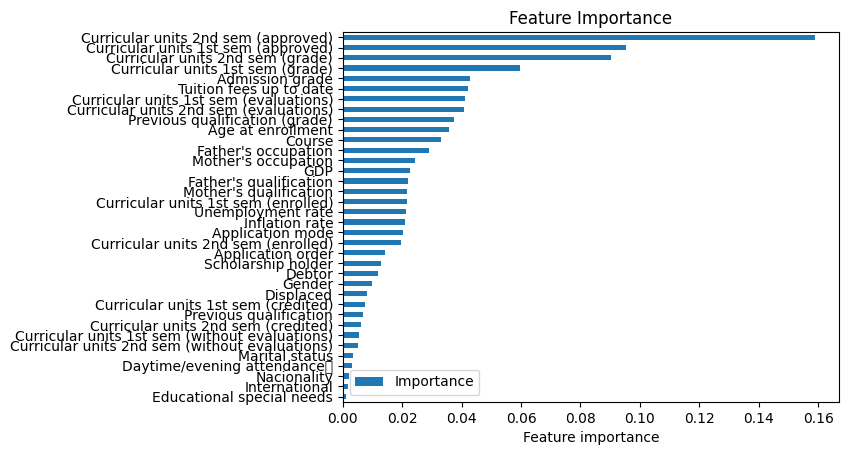

In [23]:
# Genereating Random Forest
random_forest_dt = RandomForestClassifier(max_features='sqrt', n_estimators=100)
random_forest_dt.fit(X_train, y_train)

# Printing Test Accuracy
preds = random_forest_dt.predict(X_test)
test_acc = metrics.accuracy_score(preds, y_test)
print("Test Accuracy: ", test_acc)

# Printing Important features
feature_importance = pd.DataFrame({'Importance': random_forest_dt.feature_importances_},
             index = X_train.columns)
feature_importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Feature importance')
plt.gca().lengend_ = None
plt.show()